# Importing Packages

In [1]:
# Data Manipulation
import pandas as pd
import numpy as np

# Plotting
import matplotlib.pyplot as plt

# Metrics
from sklearn.metrics import mean_squared_error

# SVM
from sklearn.linear_model import LinearRegression

# Saving Models
import joblib

# Helper Function

In [2]:
def fit_lr_model(df: pd.DataFrame, company_name: str):
    """
    Fitting an Optimized Random Forests Model for each Company
    
    INPUTS:
        :df (pd.DataFrame): Input dataframe
        :company_name (str): Company name
    """
    # Train test split
    train = df.loc[:"2021-10-29", :]
    test = df.loc["2021-10-29":, :]
    # Splitting into targets and features
    X_train, y_train = train.drop(["Adj_Close"], axis=1).to_numpy(), train["Adj_Close"].to_numpy()
    X_test, y_test = test.drop(["Adj_Close"], axis=1).to_numpy(), test["Adj_Close"].to_numpy()
    
    # Fitting the best model
    model = LinearRegression(normalize=True)
    model.fit(X_train, y_train)

    # Train and Test Predictions
    train_preds = model.predict(X_train)
    test_preds = model.predict(X_test)

    # Train and Test performance (MSE and RMSE)
    train_mse = mean_squared_error(y_true=y_train, y_pred=train_preds)
    test_mse = mean_squared_error(y_true=y_train, y_pred=train_preds)

    train_rmse = np.sqrt(train_mse)
    test_rmse = np.sqrt(test_mse)

    print(f"Training RMSE: {round(train_rmse, 4)}")
    print(f"Testing RMSE: {round(test_rmse, 4)}")
    print("-"*30, end="\n\n")


    # Plotting train and test predictions vs actual values
    fig, ax = plt.subplots(1, 2, figsize=(20, 5))

    ax[0].plot(y_train, label="Train values")
    ax[0].plot(train_preds, label="Train predictions")
    ax[0].set_xlabel("Time", size=12)
    ax[0].set_ylabel("Stock Price", size=12)
    ax[0].set_ylim([y_train.min()-10, y_train.max()+10])
    ax[0].set_title(f"{company_name}: Train values vs predictions", size=15)
    ax[0].grid()
    ax[0].legend()

    ax[1].plot(y_test, label="Test values")
    ax[1].plot(test_preds, label="Test predictions")
    ax[1].set_xlabel("Time", size=12)
    ax[1].set_ylabel("Stock Price", size=12)
    ax[1].set_ylim([y_train.min()-10, y_test.max()+10])
    ax[1].set_title(f"{company_name}: Test values vs predictions", size=15)
    ax[1].grid()
    ax[1].legend()

    plt.show()
    
    # Returning Model
    return model

# Fitting models for each company

## Facebook

Reading dataset, and adding past 10 days observations.

In [3]:
df = pd.read_csv("/content/fb_sentiment_df.csv")
df.set_index(["Date"], inplace=True)
for n_shift in range(1, 11):
    col_name = "Adj_Close"+"_Shift_"+str(n_shift)
    df[col_name] = df["Adj_Close"].shift(n_shift)
df.dropna(inplace=True)

Model

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,


Training RMSE: 3.7926
Testing RMSE: 3.7926
------------------------------



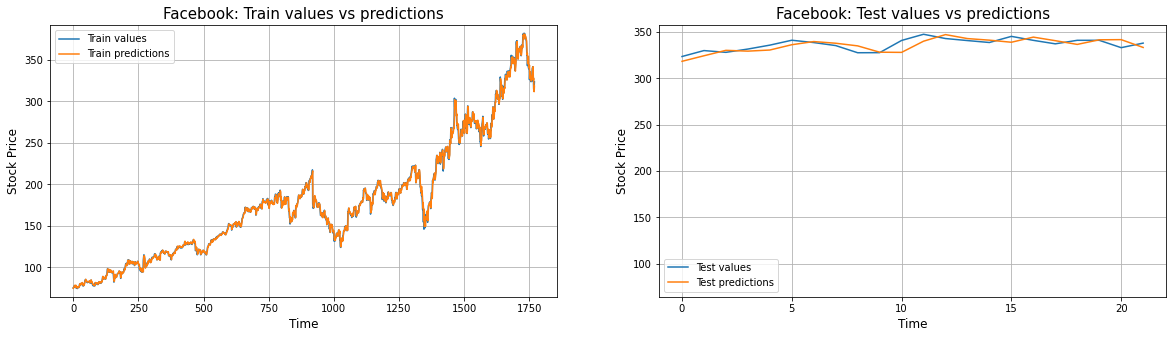

In [4]:
fb_model = fit_lr_model(df = df, company_name = "Facebook")

## Apple

Reading dataset, and adding past 10 days observations.

In [5]:
df = pd.read_csv("/content/aapl_sentiment_df.csv")
df.set_index(["Date"], inplace=True)
for n_shift in range(1, 11):
    col_name = "Adj_Close"+"_Shift_"+str(n_shift)
    df[col_name] = df["Adj_Close"].shift(n_shift)
df.dropna(inplace=True)

Model

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,


Training RMSE: 3.7987
Testing RMSE: 3.7987
------------------------------



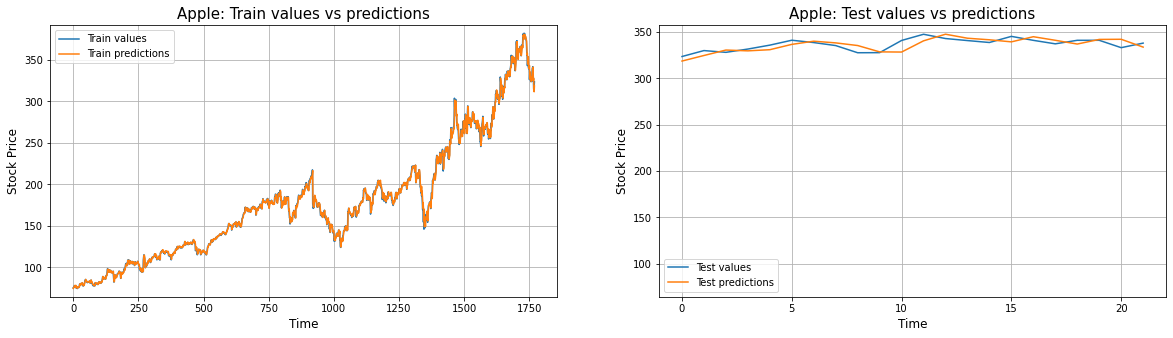

In [6]:
aapl_model = fit_lr_model(df = df, company_name = "Apple")

## Amazon

Reading dataset, and adding past 10 days observations.

In [7]:
df = pd.read_csv("/content/amzn_sentiment_df.csv")
df.set_index(["Date"], inplace=True)
for n_shift in range(1, 11):
    col_name = "Adj_Close"+"_Shift_"+str(n_shift)
    df[col_name] = df["Adj_Close"].shift(n_shift)
df.dropna(inplace=True)

Model

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,


Training RMSE: 3.7997
Testing RMSE: 3.7997
------------------------------



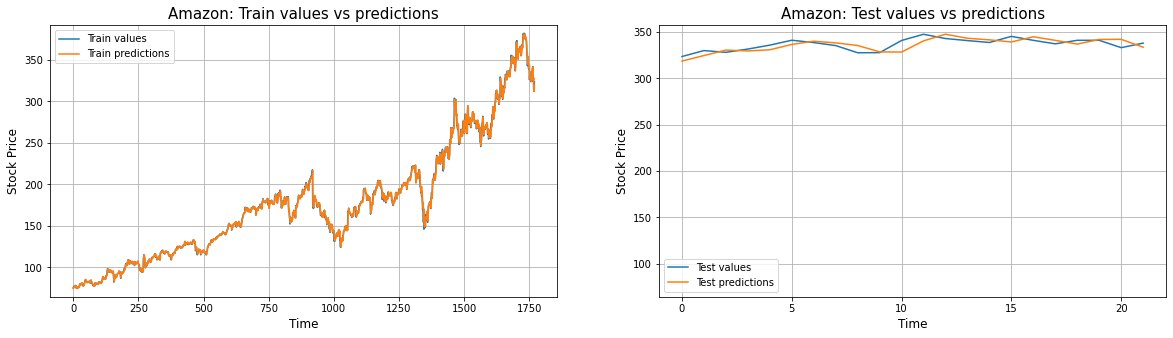

In [8]:
amzn_model = fit_lr_model(df = df, company_name = "Amazon")

## Netflix

Reading dataset, and adding past 10 days observations.

In [9]:
df = pd.read_csv("/content/nflx_sentiment_df.csv")
df.set_index(["Date"], inplace=True)
for n_shift in range(1, 11):
    col_name = "Adj_Close"+"_Shift_"+str(n_shift)
    df[col_name] = df["Adj_Close"].shift(n_shift)
df.dropna(inplace=True)

Model

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,


Training RMSE: 3.7979
Testing RMSE: 3.7979
------------------------------



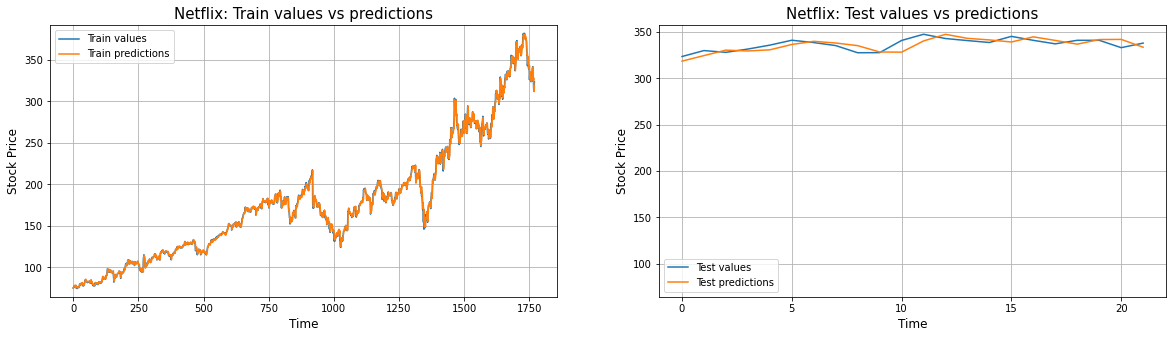

In [10]:
nflx_model = fit_lr_model(df = df, company_name = "Netflix")

## Google

Reading dataset, and adding past 10 days observations.

In [14]:
df = pd.read_csv("/content/goog_sentiment_df.csv")
df.set_index(["Date"], inplace=True)
for n_shift in range(1, 11):
    col_name = "Adj_Close"+"_Shift_"+str(n_shift)
    df[col_name] = df["Adj_Close"].shift(n_shift)
df.dropna(inplace=True)

Model

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,


Training RMSE: 3.7967
Testing RMSE: 3.7967
------------------------------



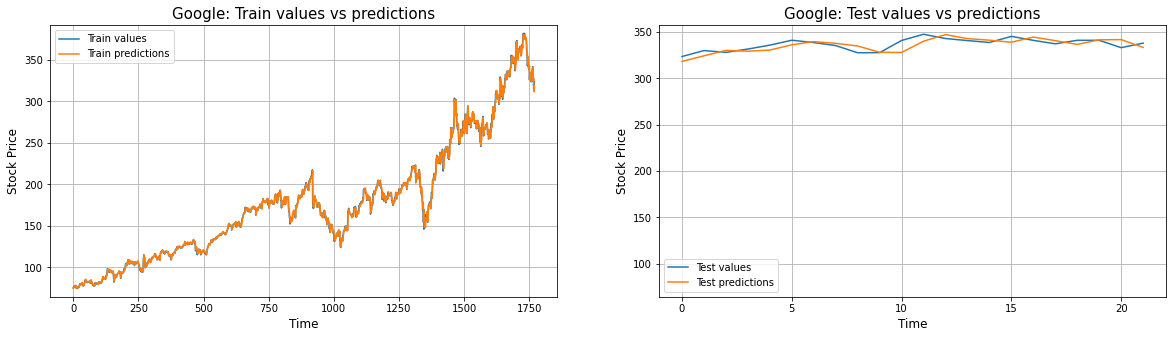

In [15]:
goog_model = fit_lr_model(df = df, company_name = "Google")

# Saving Models

In [16]:
joblib.dump(fb_model, "lr_fb.joblib")
joblib.dump(aapl_model, "lr_aapl.joblib")
joblib.dump(amzn_model, "lr_amzn.joblib")
joblib.dump(nflx_model, "lr_nflx.joblib")
joblib.dump(goog_model, "lr_goog.joblib")

['lr_goog.joblib']